In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-dataset/WineQT.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import catboost

# Importing the contents of the given [dataset](/kaggle/input/wine-quality-dataset/WineQT.csv).

In [3]:
wine_df=pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

# Datatypes used in the given dataset.

In [5]:
print("Data types: \n{}".format(wine_df.dtypes))

Data types: 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


# Looking for empty columns

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### There's no empty columns.

# Visualizing the given columns.

### 1. Fixed Acidity data. 

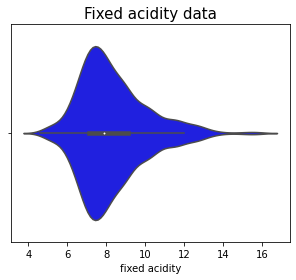

In [7]:
plt.figure(figsize=(5,4))
sns.violinplot(x='fixed acidity',data=wine_df,color='b');
plt.title("Fixed acidity data",{'fontsize':15});

### 2. Volatile acidity.

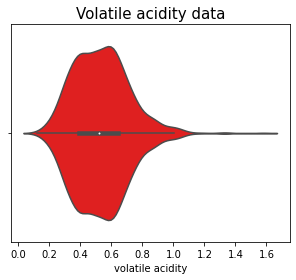

In [8]:
plt.figure(figsize=(5,4))
sns.violinplot(x='volatile acidity',data=wine_df,color='r');
plt.title("Volatile acidity data",{'fontsize':15});

### 3. Citric acid.

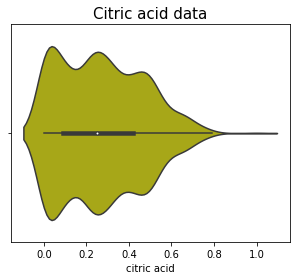

In [9]:
plt.figure(figsize=(5,4))
sns.violinplot(x='citric acid',data=wine_df,color='y');
plt.title("Citric acid data",{'fontsize':15});

### 4. residual sugar.

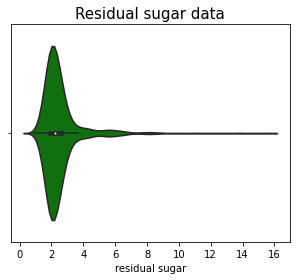

In [10]:
plt.figure(figsize=(5,4))
sns.violinplot(x='residual sugar',data=wine_df,color='g');
plt.title("Residual sugar data",{'fontsize':15});

### 5. Chlorides.

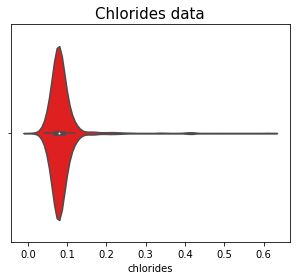

In [11]:
plt.figure(figsize=(5,4))
sns.violinplot(x='chlorides',data=wine_df,color='r');
plt.title("Chlorides data",{'fontsize':15});

### 6. pH.

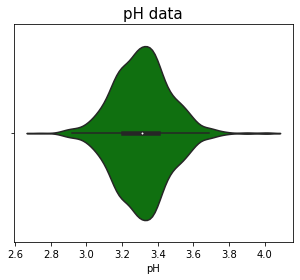

In [12]:
plt.figure(figsize=(5,4))
sns.violinplot(x='pH',data=wine_df,color='g');
plt.title("pH data",{'fontsize':15});

### 7. Alcohol.

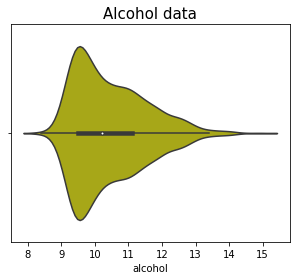

In [13]:
plt.figure(figsize=(5,4))
sns.violinplot(x='alcohol',data=wine_df,color='y');
plt.title("Alcohol data",{'fontsize':15});

In [14]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [15]:
print('The description of the given data: ')
print()
print({wine_df.info()})

The description of the given data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
{None}


# Representing it in the form of table.

In [16]:
wine_df.corr().style.background_gradient(cmap = 'Purples')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


<AxesSubplot:>

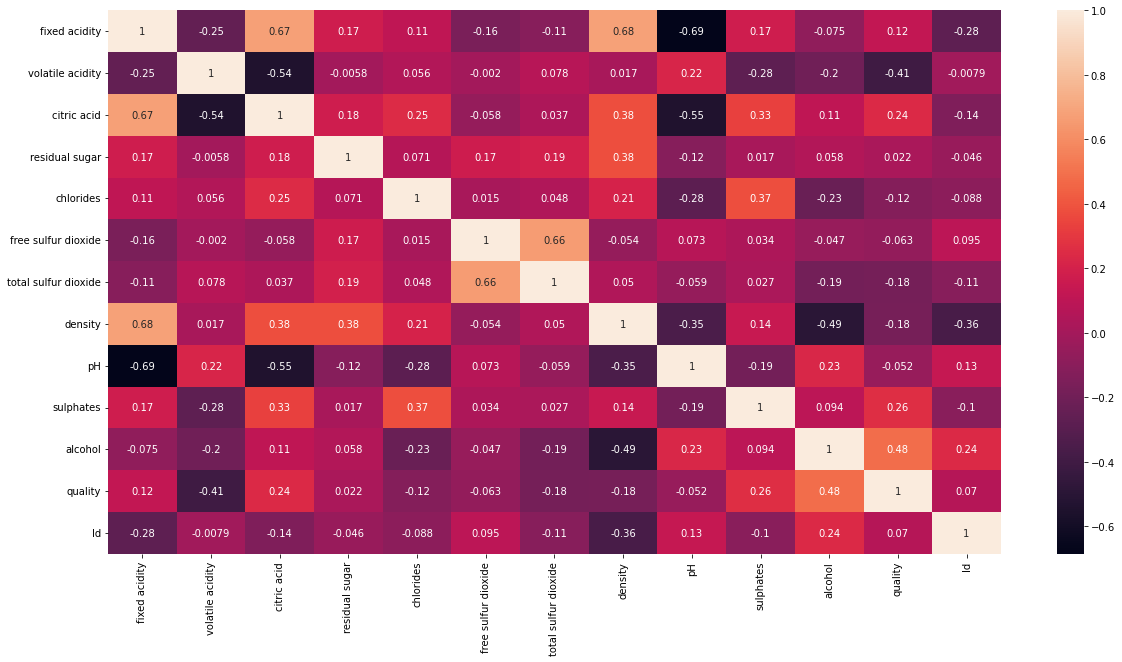

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(wine_df.corr(), annot=True)

# Final model building.

#### Dropping Id from the given dataset.

In [18]:
wine_df.drop('Id', axis = 1, inplace=True)

In [19]:
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101);
print(f'Shape of the X_train: {X_train.shape}');
print(f'Shape of the X_test: {X_test.shape}');
print(f'Shape of the y_train: {y_train.shape}');
print(f'Shape of the y_test: {y_test.shape}');

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)
Shape of the y_train: (914,)
Shape of the y_test: (229,)


In [21]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    print('Starting ...')
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss = ss.fit_transform(X_test)
    print("Scaling process is done ...")
    mod = model.fit(X_train, y_train)
    mod_pred = model.predict(X_test)
    print("Classification report of the Model: \n {}".format(classification_report(y_test, mod_pred)))
    print("Confusion Matrix of the given Model: \n {}".format(confusion_matrix(y_test, mod_pred)))
    print("Accuracy of the Model: \n{}".format(accuracy_score(y_test, mod_pred)))
    print("Evaluation process is done ...")
    return mod

In [22]:
rfc = RandomForestClassifier()
model_evaluation(rfc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.77      0.78      0.78       102
           6       0.64      0.75      0.69        91
           7       0.62      0.37      0.47        27
           8       0.50      0.50      0.50         2

    accuracy                           0.69       229
   macro avg       0.42      0.40      0.40       229
weighted avg       0.67      0.69      0.68       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0 80 22  0  0]
 [ 0  0 16 68  6  1]
 [ 0  0  2 15 10  0]
 [ 0  0  0  1  0  1]]
Accuracy of the Model: 
0.6943231441048034
Evaluation process is done ...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()

In [23]:
dtc = DecisionTreeClassifier()
model_evaluation(dtc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.17      0.18         6
           5       0.73      0.73      0.73       102
           6       0.60      0.60      0.60        91
           7       0.54      0.52      0.53        27
           8       0.25      0.50      0.33         2

    accuracy                           0.63       229
   macro avg       0.39      0.42      0.40       229
weighted avg       0.63      0.63      0.63       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  1  3  2  0  0]
 [ 1  1 74 24  2  0]
 [ 0  3 20 55 10  3]
 [ 0  0  3 10 14  0]
 [ 0  0  0  1  0  1]]
Accuracy of the Model: 
0.6331877729257642
Evaluation process is done ...


DecisionTreeClassifier()

In [24]:
svc = SVC()
model_evaluation(svc, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.64      0.42      0.51       102
           6       0.45      0.80      0.58        91
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.51       229
   macro avg       0.18      0.20      0.18       229
weighted avg       0.46      0.51      0.46       229

Confusion Matrix of the given Model: 
 [[ 0  0  0  1  0  0]
 [ 0  0  2  4  0  0]
 [ 0  0 43 59  0  0]
 [ 0  0 18 73  0  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  2  0  0]]
Accuracy of the Model: 
0.5065502183406113
Evaluation process is done ...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC()

In [25]:
xgb = xgboost.XGBClassifier()
model_evaluation(xgb, X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Starting ...
Scaling process is done ...
[10:46:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report of the Model: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.74      0.74      0.74       102
           6       0.62      0.69      0.65        91
           7       0.67      0.52      0.58        27
           8       0.25      0.50      0.33         2

    accuracy                           0.67       229
   macro avg       0.38      0.41      0.38       229
weighted avg       0.65      0.67      0.66       229

Confusion Matrix of the given Model: 
 [[ 0  0  1  0  0  0]
 [ 0  0  5  1  0  0]
 [ 0  0 75 27  0  0]
 [ 0  0 19 63  7  2]
 [

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [26]:
cat = catboost.CatBoostClassifier()
model_evaluation(cat, X_train, y_train, X_test, y_test)

Starting ...
Scaling process is done ...
Learning rate set to 0.078765
0:	learn: 1.6959588	total: 57.8ms	remaining: 57.8s
1:	learn: 1.6152352	total: 62.8ms	remaining: 31.3s
2:	learn: 1.5420301	total: 67.3ms	remaining: 22.4s
3:	learn: 1.4790990	total: 71.7ms	remaining: 17.8s
4:	learn: 1.4272293	total: 76.4ms	remaining: 15.2s
5:	learn: 1.3801140	total: 81.2ms	remaining: 13.5s
6:	learn: 1.3378452	total: 85.7ms	remaining: 12.2s
7:	learn: 1.3007202	total: 90.1ms	remaining: 11.2s
8:	learn: 1.2666360	total: 94.8ms	remaining: 10.4s
9:	learn: 1.2357985	total: 99.1ms	remaining: 9.81s
10:	learn: 1.2053916	total: 104ms	remaining: 9.36s
11:	learn: 1.1786206	total: 108ms	remaining: 8.9s
12:	learn: 1.1573092	total: 113ms	remaining: 8.57s
13:	learn: 1.1335753	total: 118ms	remaining: 8.28s
14:	learn: 1.1114943	total: 122ms	remaining: 8.03s
15:	learn: 1.0926481	total: 127ms	remaining: 7.81s
16:	learn: 1.0763406	total: 132ms	remaining: 7.62s
17:	learn: 1.0584154	total: 137ms	remaining: 7.48s
18:	learn: 1

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
